In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
df = pd.read_csv("encoded_features.csv")
df.head()

,Unnamed: 0,date,start_station_name,start_station_id,zip_code,start_hour,mean_temperature_f,mean_humidity,mean_visibility_miles,mean_wind_speed_mph,precipitation_inches,weekday,isHoliday,isRushHour,zip_code_1h,year
0,0,2013-08-29,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",27,94041,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",70.0,72.0,10.0,5.0,0.0,"[0, 0, 0, 0, 1, 0, 0]",0,1,"[1, 0, 0, 0]",2013
1,1,2013-08-29,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",27,94041,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",70.0,72.0,10.0,5.0,0.0,"[0, 0, 0, 0, 1, 0, 0]",0,1,"[1, 0, 0, 0]",2013
2,2,2013-08-29,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",27,94041,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",70.0,72.0,10.0,5.0,0.0,"[0, 0, 0, 0, 1, 0, 0]",0,1,"[1, 0, 0, 0]",2013
3,3,2013-08-29,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",27,94041,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",70.0,72.0,10.0,5.0,0.0,"[0, 0, 0, 0, 1, 0, 0]",0,1,"[1, 0, 0, 0]",2013
4,4,2013-08-29,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",27,94041,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",70.0,72.0,10.0,5.0,0.0,"[0, 0, 0, 0, 1, 0, 0]",0,0,"[1, 0, 0, 0]",2013


In [48]:
df_grouped = df.groupby(["date", "start_station_id", "start_hour"])["date"].count().reset_index(name="count")
df_grouped = df_grouped.merge(df, on=["date", "start_station_id", "start_hour"])
y = df_grouped["count"]

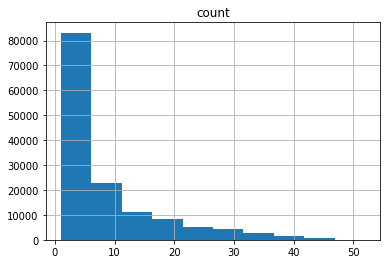

In [49]:
df_grouped.hist(column = "count")
plt.show()

In [44]:

#df_grouped = df_grouped.drop("count", axis = 1)
df_grouped = df_grouped.drop("date", axis = 1)
X = df_grouped

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

KeyError: 'count'

In [45]:
reg = LinearRegression().fit(X, y)
reg.predict(X_train)

ValueError: could not convert string to float: '2013-08-29'